<a href="https://colab.research.google.com/github/abhay211/DataDiscoveryHub/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


#Handling Missing Values

In [ ]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

#Data Visualization for High prices

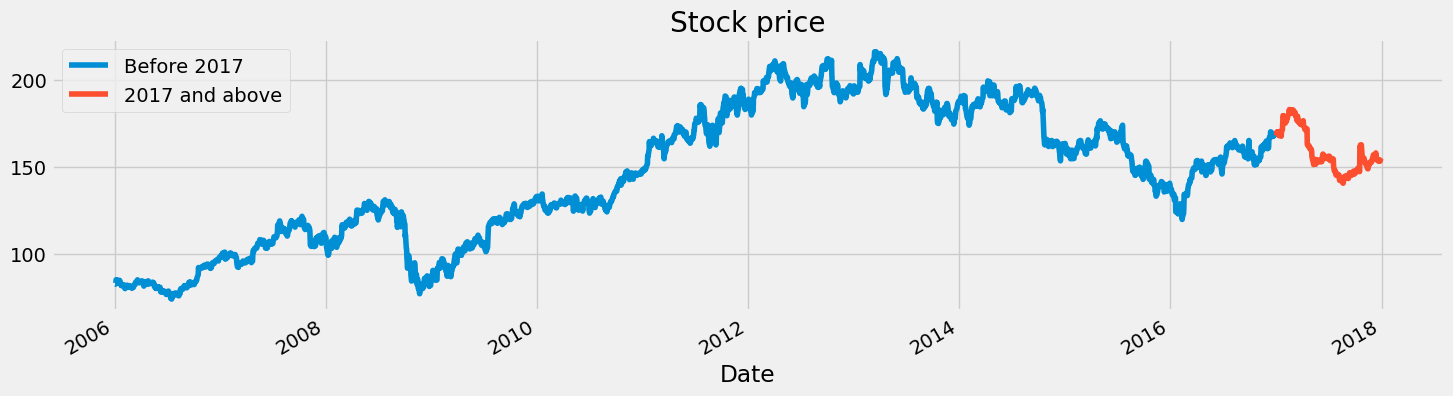

In [ ]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Before 2017','2017 and above'])
plt.title('Stock price')
plt.show()

#Scaling the data

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#Creating a structure with 60 steps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping X_train for efficient modelling

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))


#LSTM Model Architecture

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')
model_lstm.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 16s 99ms/step - loss: 0.0191
Epoch 2/50
85/85 [==============================] - 9s 110ms/step - loss: 0.0101
Epoch 3/50
85/85 [==============================] - 9s 110ms/step - loss: 0.0075
Epoch 4/50
85/85 [==============================] - 9s 103ms/step - loss: 0.0073
Epoch 5/50
85/85 [==============================] - 9s 105ms/step - loss: 0.0065
Epoch 6/50
85/85 [==============================] - 9s 110ms/step - loss: 0.0060
Epoch 7/50
85/85 [==============================] - 9s 111ms/step - loss: 0.0053
Epoch 8/50
85/85 [==============================] - 8s 99ms/step - loss: 0.0050
Epoch 9/50
85/85 [==============================] - 9s 111ms/step - loss: 0.0047
Epoch 10/50
85/85 [==============================] - 9s 110ms/step - loss: 0.0040
Epoch 11/50
85/85 [==============================] - 9s 103ms/step - loss: 0.0038
Epoch 12/50
85/85 [==============================] - 9s 104ms/step - loss: 0.0038
Epoch 13/50
85/85 [=======

#Test set preprocessing

In [ ]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 27ms/step


#Plot Predictions Function

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Stock Price')
    plt.plot(predicted, color='green',label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

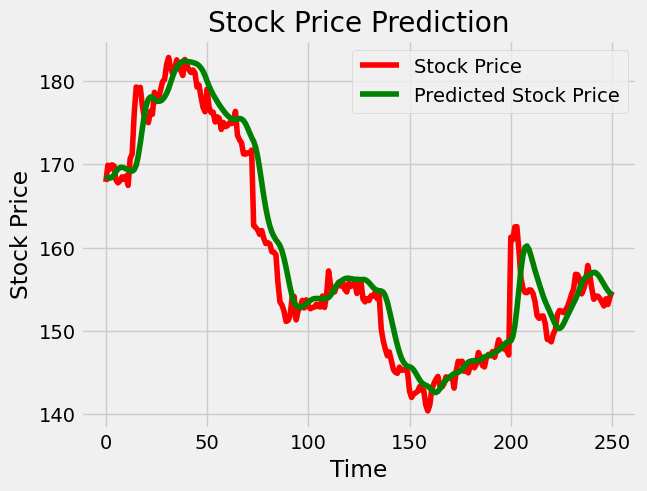

In [ ]:
plot_predictions(test_set,predicted_stock_price)


#Evaluation Function for RMSE

In [ ]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("Root mean squared error {}.".format(rmse))

In [ ]:
return_rmse(test_set,predicted_stock_price)


Root mean squared error 3.135678485091325.


#Gated Recurret Units Neural network GRU

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50, activation='tanh'))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer=tf.keras.optimizers.legacy.SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
model_gru.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


19/19 [==============================] - 10s 197ms/step - loss: 0.0942
Epoch 2/50
19/19 [==============================] - 5s 247ms/step - loss: 0.0266
Epoch 3/50
19/19 [==============================] - 4s 189ms/step - loss: 0.0072
Epoch 4/50
19/19 [==============================] - 4s 187ms/step - loss: 0.0046
Epoch 5/50
19/19 [==============================] - 5s 242ms/step - loss: 0.0038
Epoch 6/50
19/19 [==============================] - 4s 188ms/step - loss: 0.0037
Epoch 7/50
19/19 [==============================] - 4s 186ms/step - loss: 0.0038
Epoch 8/50
19/19 [==============================] - 4s 209ms/step - loss: 0.0036
Epoch 9/50
19/19 [==============================] - 4s 219ms/step - loss: 0.0032
Epoch 10/50
19/19 [==============================] - 4s 187ms/step - loss: 0.0034
Epoch 11/50
19/19 [==============================] - 4s 188ms/step - loss: 0.0032
Epoch 12/50
19/19 [==============================] - 5s 246ms/step - loss: 0.0030
Epoch 13/50
19/19 [================

In [ ]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 [==============================] - 2s 38ms/step


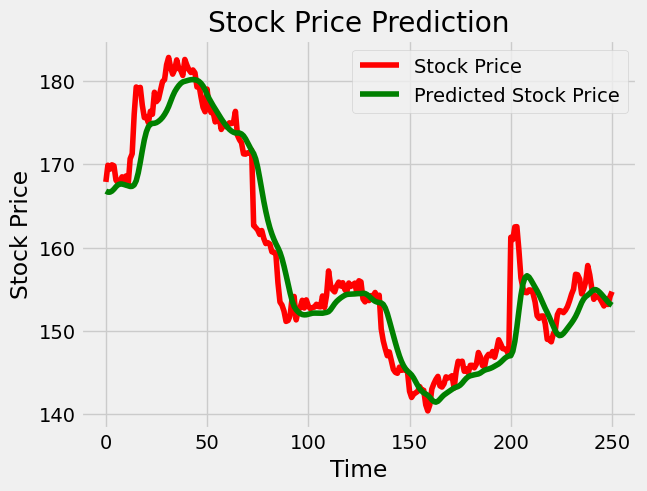

In [ ]:
plot_predictions(test_set,GRU_predicted_stock_price)


In [ ]:
return_rmse(test_set,GRU_predicted_stock_price)


Root mean squared error 3.2297333471622562.
